In [1]:
from tensorflow import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


In [3]:
#x_train_new , y_train_new = x_train[(y_train==0) | (y_train==8)], y_train[(y_train==0) | (y_train==8)]

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
#x_test_new , y_test_new = x_test[(y_test==0) | (y_test==8)] , y_test[(y_test==0)|(y_test==8)]

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
x_train_final=x_train.reshape((-1,3072))
x_train_final.shape

(50000, 3072)

In [13]:
x_test_final=x_test.reshape((-1,3072))
x_test_final.shape

(10000, 3072)

In [14]:
x_train_final = x_train_final / 255
x_test_final = x_test_final / 255

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(keras.layers.Dense(10,input_shape=(3072,),activation='softmax'))

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [18]:
result=model.fit(
x=x_train_final,
y=y_train,
shuffle=True,
validation_data=(x_test_final,y_test),    
epochs=30,
batch_size=16)

Epoch 1/30
3125/3125 [==============================] - 8s 2ms/step - loss: 1.9842 - accuracy: 0.2992 - val_loss: 1.8641 - val_accuracy: 0.3415
Epoch 2/30
3125/3125 [==============================] - 4s 1ms/step - loss: 1.8893 - accuracy: 0.3441 - val_loss: 1.9782 - val_accuracy: 0.3253
Epoch 3/30
3125/3125 [==============================] - 4s 1ms/step - loss: 1.8596 - accuracy: 0.3533 - val_loss: 1.9370 - val_accuracy: 0.3353curacy: 
Epoch 4/30
3125/3125 [==============================] - 4s 1ms/step - loss: 1.8415 - accuracy: 0.3601 - val_loss: 1.8900 - val_accuracy: 0.3405
Epoch 5/30
3125/3125 [==============================] - 4s 1ms/step - loss: 1.8334 - accuracy: 0.3630 - val_loss: 1.8568 - val_accuracy: 0.3564
Epoch 6/30
3125/3125 [==============================] - 4s 1ms/step - loss: 1.8222 - accuracy: 0.3710 - val_loss: 1.7890 - val_accuracy: 0.3786
Epoch 7/30
3125/3125 [==============================] - 3s 1ms/step - loss: 1.8138 - accuracy: 0.3732 - val_loss: 1.9567 - val_a

In [19]:
test=model.evaluate(x=x_test_final,y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9373 - accuracy: 0.3335


In [20]:
model.predict(x_test_final)

array([[4.28824266e-03, 7.91912246e-03, 4.55768034e-02, ...,
        4.26500948e-04, 4.30815816e-02, 1.95888599e-04],
       [7.07476586e-02, 1.08465329e-01, 2.92735342e-02, ...,
        6.91994501e-04, 2.22386554e-01, 5.15578926e-01],
       [5.12285054e-01, 2.55816747e-02, 2.67122108e-02, ...,
        3.22495517e-03, 2.88634121e-01, 3.46927121e-02],
       ...,
       [1.00565422e-02, 7.37696048e-03, 1.27459109e-01, ...,
        2.83615608e-02, 5.95736923e-03, 5.04733482e-03],
       [1.25027020e-02, 6.46810904e-02, 1.39108270e-01, ...,
        7.84885045e-03, 7.64072221e-03, 1.44257937e-02],
       [7.38530084e-02, 8.09839461e-03, 3.06731701e-01, ...,
        1.02587126e-01, 1.98069289e-02, 8.47122166e-03]], dtype=float32)

Text(0.5, 0, 'epoch')

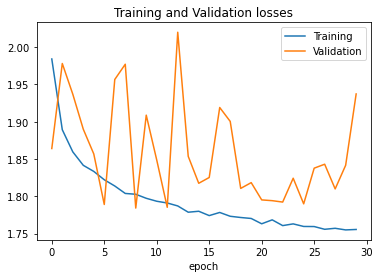

In [21]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

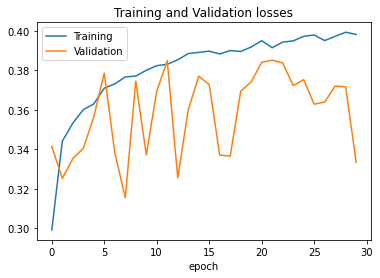

In [22]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')


the number is  [8] 

[[0.07074769 0.10846537 0.02927354 0.04151337 0.00421661 0.00298447
  0.00414163 0.00069199 0.22238596 0.51557934]]


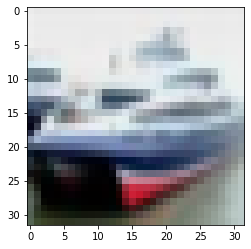

In [27]:
print('the number is ',y_test[1],'\n')#2,3,7,8,9
idx=[1]
print(model.predict(x_test_final[idx,:].reshape(1,-1)))
plt.imshow(x_test_final[idx,:].reshape(32,32,3))